In [87]:
from TotalCalculation import *
from preprocessing import *
import os
from datetime import datetime as dt

In [88]:
filename = image.getFilename(path=r'C:\Users\ASUS\Documents\NARIT_internship_data\All_sky_camera_Chile\2024-07\2024-07-07')
img = [cv2.cvtColor(cv2.imread(f),cv2.COLOR_BGR2RGB) for f in filename]
print(filename)

['C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Chile\\2024-07\\2024-07-07\\638558820311162298.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Chile\\2024-07\\2024-07-07\\638558821511812473.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Chile\\2024-07\\2024-07-07\\638558822712918731.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Chile\\2024-07\\2024-07-07\\638558823914049861.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Chile\\2024-07\\2024-07-07\\638558825115686028.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Chile\\2024-07\\2024-07-07\\638558826316562604.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Chile\\2024-07\\2024-07-07\\638558827517311164.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Chile\\2024-07\\2024-07-07\\638558828719040249.png', 'C:\\Users\\ASUS\\Documents\\NARIT_inte

In [89]:
filetime = []
extract_name = lambda x : int(os.path.splitext(os.path.basename(x))[0])
filetime = [extract_name(i) for i in filename]
decimal = [timeConvertion().datetime_to_decimal(time=timeConvertion().ticks_to_datetime(ticks=t,time_zone=-4)) for t in filetime]
print(decimal)

[0.008611111111111111, 0.041944444444444444, 0.07527777777777778, 0.10861111111111112, 0.14194444444444443, 0.17527777777777775, 0.20861111111111114, 0.24194444444444446, 0.27555555555555555, 0.3088888888888889, 0.3422222222222222, 0.37555555555555553, 0.4088888888888889, 0.44222222222222224, 0.47555555555555556, 0.5088888888888888, 0.5422222222222222, 0.5758333333333333, 0.6091666666666666, 0.6425, 0.6758333333333333, 0.7091666666666666, 0.7424999999999999, 0.7758333333333334, 0.8091666666666667, 0.8425, 0.8761111111111112, 0.9094444444444445, 0.9427777777777778, 0.9761111111111112, 1.0094444444444444, 1.0427777777777778, 1.076111111111111, 1.1094444444444445, 1.1427777777777777, 1.1927777777777777, 1.226388888888889, 1.2597222222222222, 1.2930555555555554, 1.3263888888888888, 1.3597222222222223, 1.3930555555555555, 1.426388888888889, 1.4597222222222221, 1.4930555555555556, 1.5263888888888888, 1.56, 1.5933333333333335, 1.6266666666666667, 1.66, 1.6933333333333334, 1.7266666666666668, 

In [90]:
decimal = []
for i in filetime:    
    t = timeConvertion().ticks_to_datetime(ticks=i,time_zone=-4)
    decimal.append(timeConvertion().datetime_to_decimal(time=t))

In [91]:
start_date = str(dt(t.year,1,1).date())
sunrise,sunset = SunPosition().SunriseSunset(location=[-30.16776,-70.80516],Time_zone=-4,filename=filetime[7],start_date=start_date,include_end_date=True)
print(sunrise,sunset)

7.728868124810063 17.862556538666652


In [92]:
filtering = lambda x : (x > sunrise) & (x < sunset)
day_indices = [index for index, value in enumerate(decimal) if filtering(value)]
night_indices = [index for index, value in enumerate(decimal) if not filtering(value)]

In [93]:
Day_filename = [filename[i] for i in day_indices]
night_filename = [filename[i] for i in night_indices]

In [94]:
Day_filename,night_filename = image.extract_filename(filename=filename,sunrise=sunrise,sunset=sunset)

In [95]:
print(Day_filename)

['C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Chile\\2024-07\\2024-07-07\\638559099929127535.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Chile\\2024-07\\2024-07-07\\638559102530065316.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Chile\\2024-07\\2024-07-07\\638559105131073746.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Chile\\2024-07\\2024-07-07\\638559107832338690.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Chile\\2024-07\\2024-07-07\\638559110434010450.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Chile\\2024-07\\2024-07-07\\638559113035795063.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Chile\\2024-07\\2024-07-07\\638559115637585521.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Chile\\2024-07\\2024-07-07\\638559118239047009.png', 'C:\\Users\\ASUS\\Documents\\NARIT_inte

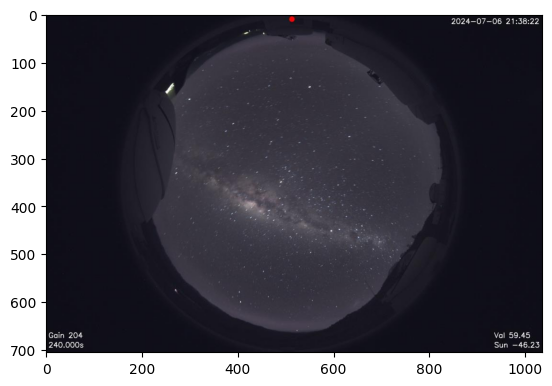

In [96]:
import cv2
from matplotlib import pyplot as plt
im = 12
images = []
images = [cv2.imread(i) for i in Day_filename]
images = [cv2.cvtColor(i,cv2.COLOR_BGR2RGB) for i in images]
plt.imshow(images[im])

In [97]:
im = 150
final = thresholding().RBratiosingle(input=img[im],filename=filetime[im],sunrise=sunrise,sunset=sunset)

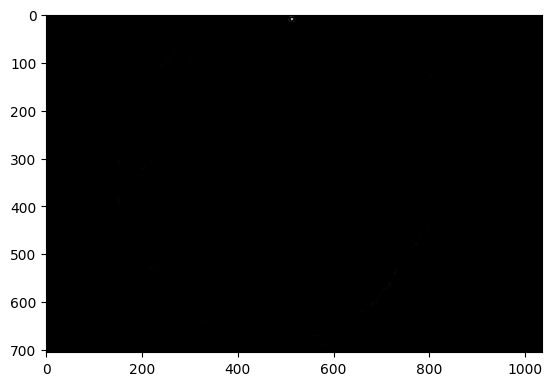

In [98]:
plt.imshow(final,cmap='gray')
#plt.imshow(img[im])